In [11]:
%matplotlib inline
%autosave 0

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

Autosave disabled


In [12]:
# Read iris data.
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
colors = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
df['color'] = map(lambda species: colors[species], df['species'])

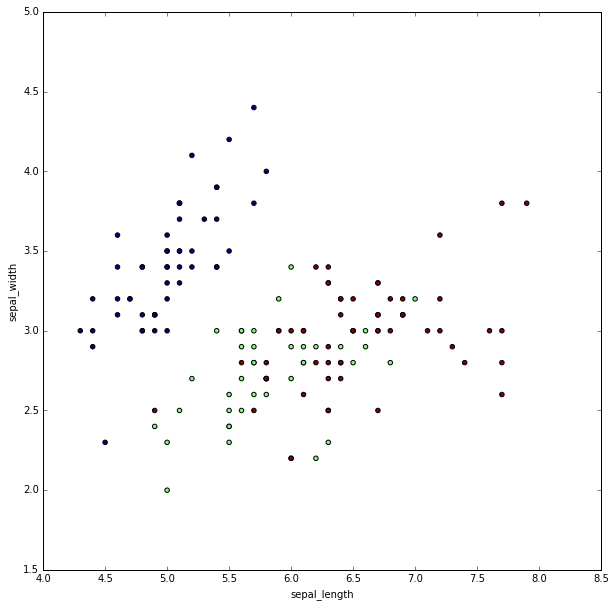

In [26]:
# Plot sepal length against sepal width.
# df.plot(x='sepal_length', y='sepal_width', kind='scatter', figsize=(8,8))
plt.figure(figsize=(10,10))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['color'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [20]:
# Choose a random point from the data set.
random.seed()
pt = df.iloc[random.choice(df.index.tolist())]
pt[['sepal_length', 'sepal_width']]

sepal_length    6.4
sepal_width     2.8
Name: 132, dtype: object

In [15]:
# Create a new dataframe that contains the distance of every point from our randomly chosen point
def dist_from_pt(p):
    """Calculate the distance of a point to a randomly chosen point."""
    return math.sqrt(((pt.sepal_length - p.sepal_length) ** 2) + ((pt.sepal_width - p.sepal_width) ** 2))

df['dist_from_pt'] = df[['sepal_length', 'sepal_width']].apply(func=dist_from_pt, axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,dist_from_pt
0,5.1,3.5,1.4,0.2,Iris-setosa,0.200000
1,4.9,3.0,1.4,0.2,Iris-setosa,0.360555
2,4.7,3.2,1.3,0.2,Iris-setosa,0.412311
3,4.6,3.1,1.5,0.2,Iris-setosa,0.538516
4,5.0,3.6,1.4,0.2,Iris-setosa,0.316228


In [16]:
# Look at 10 nearest neighbors.
df_sorted = df.sort_values(by='dist_from_pt', ascending=True)
df_sorted[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species,dist_from_pt
23,5.1,3.3,1.7,0.5,Iris-setosa,0.000000
49,5.0,3.3,1.4,0.2,Iris-setosa,0.100000
39,5.1,3.4,1.5,0.2,Iris-setosa,0.100000
35,5.0,3.2,1.2,0.2,Iris-setosa,0.141421
7,5.0,3.4,1.5,0.2,Iris-setosa,0.141421
26,5.0,3.4,1.6,0.4,Iris-setosa,0.141421
28,5.2,3.4,1.4,0.2,Iris-setosa,0.141421
0,5.1,3.5,1.4,0.2,Iris-setosa,0.200000
17,5.1,3.5,1.4,0.3,Iris-setosa,0.200000
40,5.0,3.5,1.3,0.3,Iris-setosa,0.223607


In [17]:
df_sorted['species'][0:10].value_counts().index[0]

'Iris-setosa'

In [18]:
def knn(k):
    """knn returns the majority class for the k nearest neighbors."""
    return df_sorted['species'][0:k].value_counts().index[0]

In [19]:
knn(50)

'Iris-setosa'